In [4]:
import pandas as pd
from pandas import Series,DataFrame

In [5]:
import yfinance as yf
from pandas_datareader import data as pdr

In [87]:
import matplotlib.pyplot as plt
from tabulate import tabulate

In [6]:
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from datetime import datetime,timedelta

In [7]:
yf.pdr_override()
tech_list = ['DELTACORP','ENGINERSIN','HDFCBANK','HAL','INFY','KTKBANK','RELIANCE']

In [8]:
end = datetime.now()
yesterday = end - timedelta(days=1)
start = yesterday - timedelta(days=400)
formatted_yesterday = yesterday.strftime("%b %d,%Y")
formatted_start = start.strftime("%b %d,%Y")
end,yesterday,start,formatted_yesterday,formatted_start

(datetime.datetime(2023, 11, 20, 12, 18, 28, 583175),
 datetime.datetime(2023, 11, 19, 12, 18, 28, 583175),
 datetime.datetime(2022, 10, 15, 12, 18, 28, 583175),
 'Nov 19,2023',
 'Oct 15,2022')

In [24]:
for stock in tech_list:
    try:
        globals()[stock] = pdr.get_data_yahoo(stock,formatted_start,formatted_yesterday)
    except Exception as e:
        print(f"Failed to download data for {stock}: {e}")

[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['DELTACORP']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ENGINERSIN']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HDFCBANK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['HAL']: ValueError("time data 'Nov 18,2023' does not match format '%Y-%m-%d'")



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['INFY']: ValueError("time data 'Nov 18,2023' does not match format '%Y-%m-%d'")



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['KTKBANK']: Exception('%ticker%: No timezone found, symbol may be delisted')



[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['RELIANCE']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [22]:
RELIANCE


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [9]:
for stocks in tech_list:
    try:
        data = yf.download(f'{stocks}.NS')
        data.to_csv(f'./Data/{stocks}.csv')
    except Exception as e:
        print(f'{name} ===> {e}')
        
        

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [10]:
Reliance_data = pd.read_csv('./Data/RELIANCE.csv',parse_dates=['Date'], index_col='Date')
DeltaCorp_data = pd.read_csv('./Data/DELTACORP.csv',parse_dates=['Date'], index_col='Date')
EngInd_data = pd.read_csv('./Data/ENGINERSIN.csv',parse_dates=['Date'], index_col='Date')
HdfcBank_data = pd.read_csv('./Data/HDFCBANK.csv',parse_dates=['Date'], index_col='Date')
HindAero_data = pd.read_csv('./Data/HAL.csv',parse_dates=['Date'], index_col='Date')
Infosys_data = pd.read_csv('./Data/INFY.csv',parse_dates=['Date'], index_col='Date')
KarBank_data = pd.read_csv('./Data/KTKBANK.csv',parse_dates=['Date'], index_col='Date')

In [11]:
Reliance_data,DeltaCorp_data,EngInd_data,HdfcBank_data,HindAero_data,Infosys_data,KarBank_data

(                   Open         High          Low        Close    Adj Close  \
 Date                                                                          
 1996-01-01    15.859429    15.944529    15.754989    15.917452    10.441107   
 1996-01-02    15.878770    15.956133    15.677626    15.793671    10.359915   
 1996-01-03    16.052837    16.783918    15.878770    15.913584    10.438571   
 1996-01-04    15.762726    15.813012    15.553845    15.766594    10.342153   
 1996-01-05    15.704703    15.704703    15.522900    15.658285    10.271109   
 ...                 ...          ...          ...          ...          ...   
 2023-11-13  2322.899902  2324.600098  2311.699951  2314.600098  2314.600098   
 2023-11-15  2340.000000  2361.949951  2327.000000  2356.449951  2356.449951   
 2023-11-16  2351.100098  2374.149902  2346.949951  2360.699951  2360.699951   
 2023-11-17  2352.899902  2373.250000  2352.050049  2355.550049  2355.550049   
 2023-11-20  2348.550049  2358.399902  2

<Axes: xlabel='Date'>

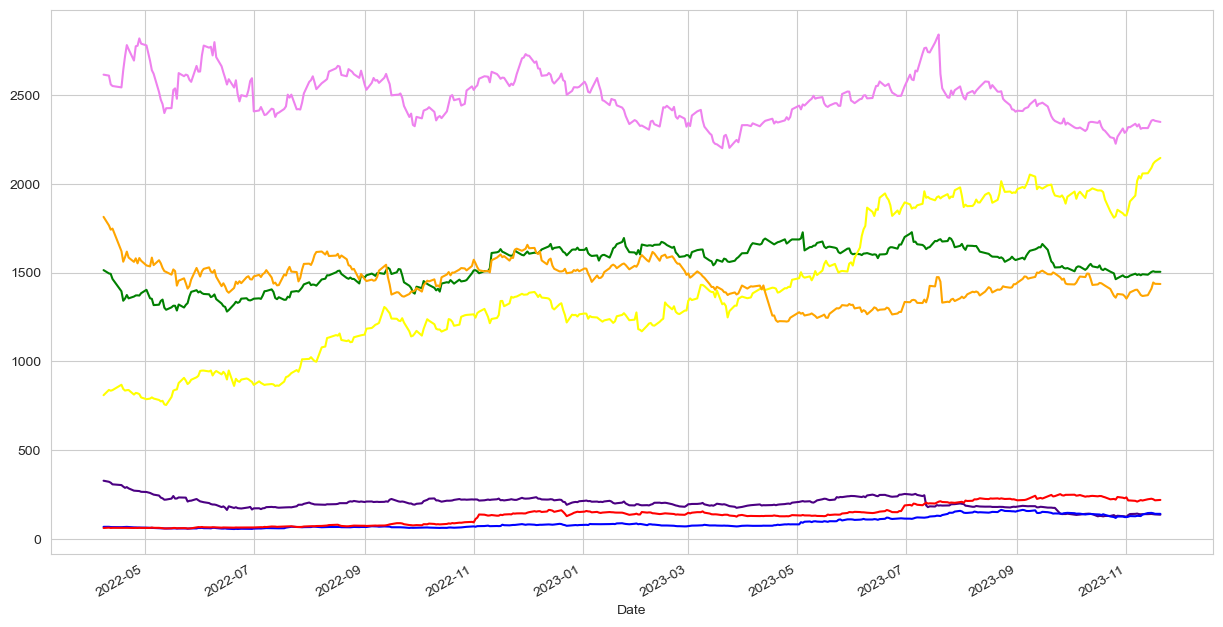

In [12]:
Reliance_data[-400:].Close.plot(figsize=(15,8),color='violet')
DeltaCorp_data[-400:].Close.plot(figsize=(15,8),color='indigo')
EngInd_data[-400:].Close.plot(figsize=(15,8),color='blue')
HdfcBank_data[-400:].Close.plot(figsize=(15,8),color='green')
HindAero_data[-400:].Close.plot(figsize=(15,8),color='yellow')
Infosys_data[-400:].Close.plot(figsize=(15,8),color='orange')
KarBank_data[-400:].Close.plot(figsize=(15,8),color='red')



In [13]:
Reliance_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000,7.008000e+03
mean,602.448671,609.436612,594.892708,601.877431,580.671222,2.837919e+07
std,731.057102,738.322684,723.193317,730.449753,730.158412,4.791799e+07
min,11.836550,11.890704,11.763055,11.890704,7.799749,0.000000e+00
25%,52.606888,53.378586,51.924160,52.475372,40.954958,6.540148e+06
50%,417.046814,422.693298,411.685135,416.415298,384.511093,1.186543e+07
75%,633.139099,643.896484,619.892776,632.510681,574.252167,2.997129e+07
max,2856.149902,2856.149902,2797.000000,2841.850098,2831.846680,6.686620e+08


In [14]:
Reliance_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7008 entries, 1996-01-01 to 2023-11-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       7008 non-null   float64
 1   High       7008 non-null   float64
 2   Low        7008 non-null   float64
 3   Close      7008 non-null   float64
 4   Adj Close  7008 non-null   float64
 5   Volume     7008 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 383.2 KB


<Axes: xlabel='Date'>

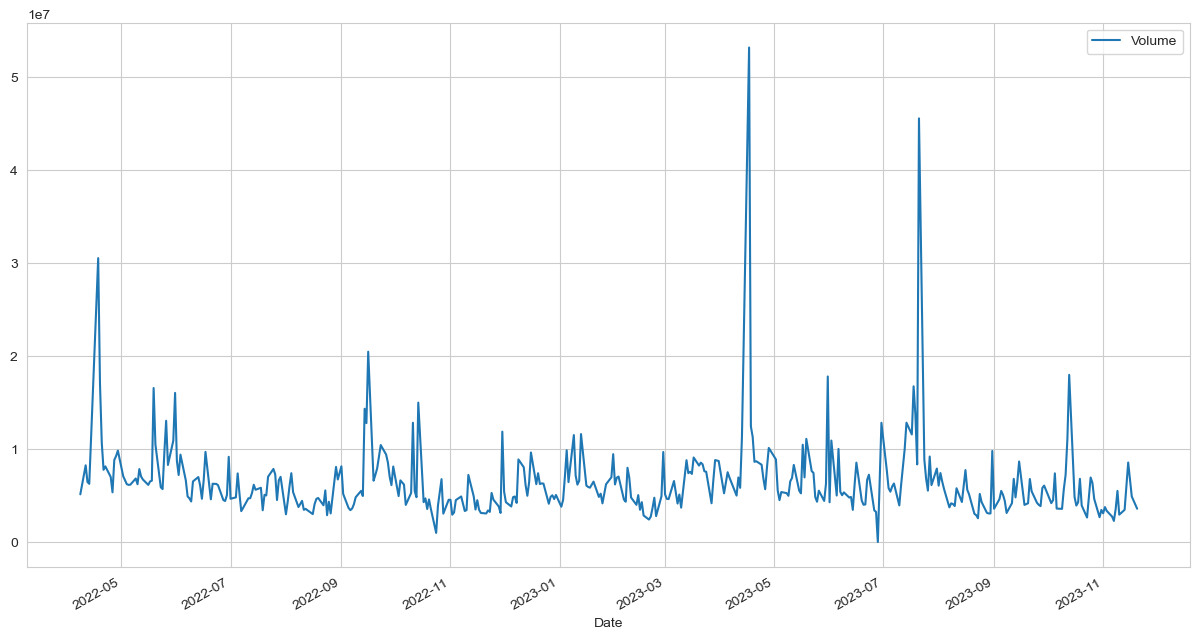

In [16]:
Infosys_data[-400:]['Volume'].plot(legend=True,figsize=(15,8))

<Axes: xlabel='Date'>

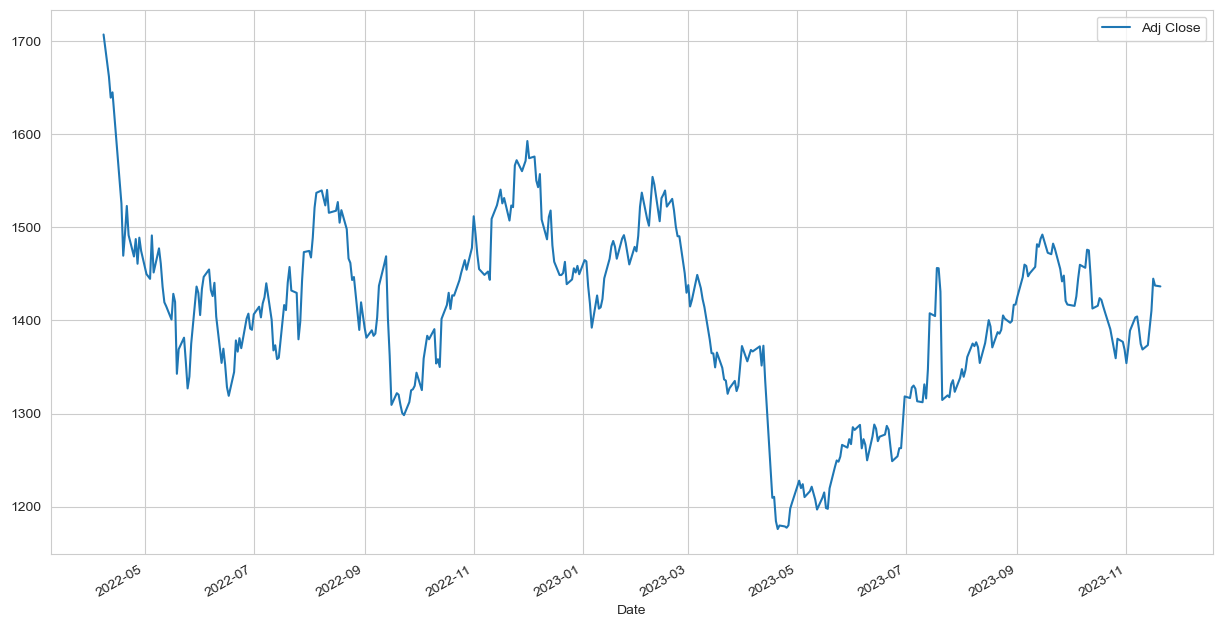

In [17]:
Infosys_data[-400:]['Adj Close'].plot(legend=True,figsize=(15,8))

In [20]:
ma_day = [10,20,50]

for ma in ma_day :
    column_name = "MA for %s days" %(str(ma))
    Infosys_data[column_name] = Infosys_data['Adj Close'].rolling(window = ma).mean()

<Axes: xlabel='Date'>

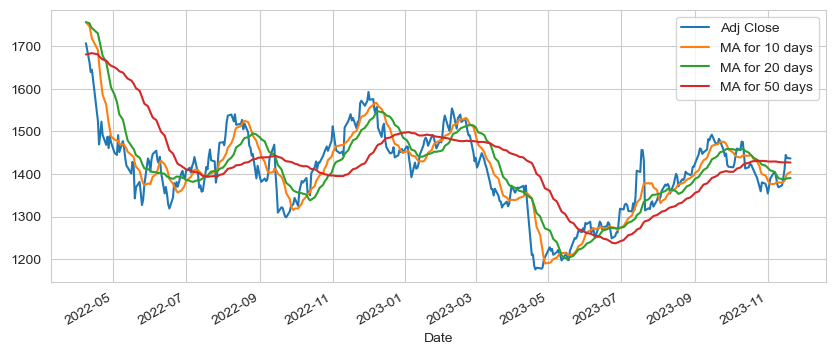

In [21]:
Infosys_data[-400:][['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

In [22]:
Infosys_data['Daily Returns']= Infosys_data['Adj Close'].pct_change()

<Axes: xlabel='Date'>

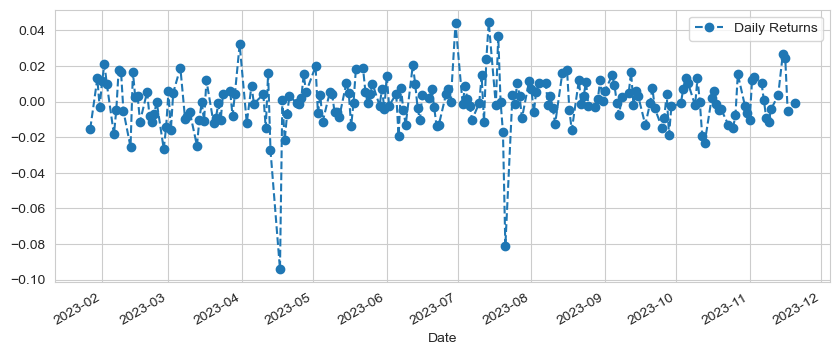

In [24]:
Infosys_data[-200:]['Daily Returns'].plot(figsize = (10,4),legend=True,linestyle ='--',marker='o')

C:\Users\ANIKET\AppData\Local\Temp\ipykernel_12916\2866024279.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=Infosys_data[-200:]['Daily Returns'],bins=50,color='blue')


<Axes: ylabel='Density'>

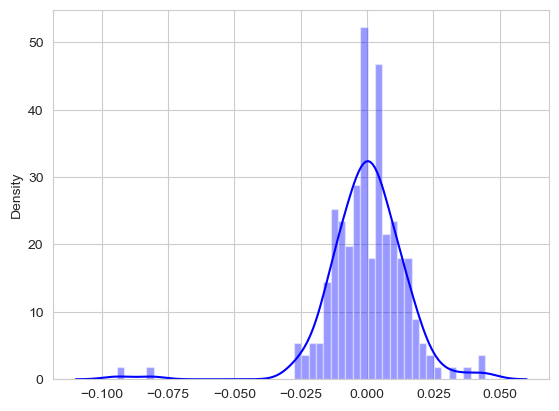

In [28]:
sns.distplot(x=Infosys_data[-200:]['Daily Returns'],bins=50,color='blue')

<Axes: >

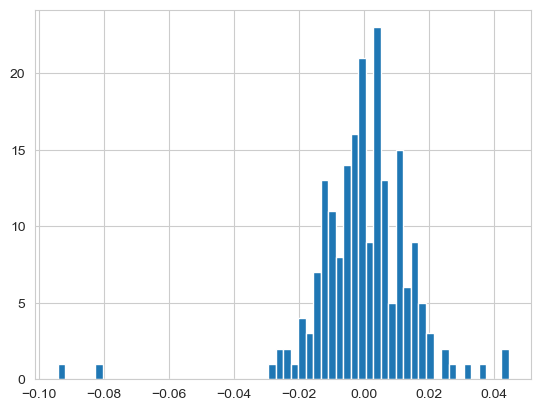

In [29]:
Infosys_data[-200:]['Daily Returns'].hist(bins=60)

In [30]:
closing_df = pdr.get_data_yahoo(tech_list,start,end)['Adj Close']

[*********************100%%**********************]  7 of 7 completed


5 Failed downloads:
['HDFCBANK', 'RELIANCE', 'ENGINERSIN', 'DELTACORP', 'KTKBANK']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [43]:
Reliance_Closing_data = pd.read_csv('./Data/RELIANCE.csv',parse_dates=['Date'], index_col='Date', usecols=['Date','Adj Close'])
DeltaCorp_Closing_data = pd.read_csv('./Data/DELTACORP.csv',parse_dates=['Date'], index_col='Date', usecols=['Date','Adj Close'])
EngInd_Closing_data = pd.read_csv('./Data/ENGINERSIN.csv',parse_dates=['Date'], index_col='Date', usecols=['Date','Adj Close'])
HdfcBank_Closing_data = pd.read_csv('./Data/HDFCBANK.csv',parse_dates=['Date'], index_col='Date', usecols=['Date','Adj Close'])
HindAero_Closing_data = pd.read_csv('./Data/HAL.csv',parse_dates=['Date'], index_col='Date', usecols=['Date','Adj Close'])
Infosys_Closing_data = pd.read_csv('./Data/INFY.csv',parse_dates=['Date'], index_col='Date', usecols=['Date','Adj Close'] )
KarBank_Closing_data = pd.read_csv('./Data/KTKBANK.csv',parse_dates=['Date'], index_col='Date', usecols=['Date','Adj Close'])

In [48]:
Reliance_Closing_data = Reliance_Closing_data.rename(columns={'Adj Close': 'Reliance'})
DeltaCorp_Closing_data = DeltaCorp_Closing_data.rename(columns={'Adj Close': 'DeltaCorp'})
EngInd_Closing_data = EngInd_Closing_data.rename(columns={'Adj Close': 'EngInd'})
HdfcBank_Closing_data = HdfcBank_Closing_data.rename(columns={'Adj Close': 'HdfcBank'})
HindAero_Closing_data = HindAero_Closing_data.rename(columns={'Adj Close': 'HindAero'})
Infosys_Closing_data = Infosys_Closing_data.rename(columns={'Adj Close': 'Infosys'})
KarBank_Closing_data = KarBank_Closing_data.rename(columns={'Adj Close': 'KarBank'})


In [49]:
Closing_Data_df_names = [
    Reliance_Closing_data,
    DeltaCorp_Closing_data,
    EngInd_Closing_data,
    HdfcBank_Closing_data,
    HindAero_Closing_data,
    Infosys_Closing_data,
    KarBank_Closing_data
]

(              Adj Close
 Date                   
 1996-01-01     0.517830
 1996-01-02     0.515736
 1996-01-03     0.519227
 1996-01-04     0.515799
 1996-01-05     0.509705
 ...                 ...
 2023-11-13  1373.550049
 2023-11-15  1410.500000
 2023-11-16  1444.900024
 2023-11-17  1437.550049
 2023-11-20  1436.599976
 
 [7011 rows x 1 columns],
              Adj Close
 Date                  
 2000-05-10    7.604304
 2000-05-11    7.305117
 2000-05-12    7.055796
 2000-05-15    7.199154
 2000-05-16    6.831406
 ...                ...
 2023-11-13  223.949997
 2023-11-15  227.000000
 2023-11-16  224.000000
 2023-11-17  218.050003
 2023-11-20  220.149994
 
 [5872 rows x 1 columns])

In [50]:
Closing_Data_df = pd.concat(Closing_Data_df_names, axis=1)

In [51]:
Closing_Data_df

,Reliance,DeltaCorp,EngInd,HdfcBank,HindAero,Infosys,KarBank
Date,,,,,,,
1996-01-01,10.441107,NaN,NaN,2.362861,NaN,0.517830,NaN
1996-01-02,10.359915,NaN,NaN,2.358896,NaN,0.515736,NaN
1996-01-03,10.438571,NaN,NaN,2.366825,NaN,0.519227,NaN
1996-01-04,10.342153,NaN,NaN,2.350966,NaN,0.515799,NaN
1996-01-05,10.271109,NaN,NaN,2.347003,NaN,0.509705,NaN
...,...,...,...,...,...,...,...
2023-11-13,2314.600098,140.250000,146.399994,1488.800049,2060.350098,1373.550049,223.949997
2023-11-15,2356.449951,141.199997,147.199997,1504.400024,2091.000000,1410.500000,227.000000
2023-11-16,2360.699951,140.000000,145.250000,1508.349976,2114.300049,1444.900024,224.000000


In [53]:
tech_rets = Closing_Data_df.pct_change()

In [54]:
tech_rets.tail()

,Reliance,DeltaCorp,EngInd,HdfcBank,HindAero,Infosys,KarBank
Date,,,,,,,
2023-11-13,-0.000130,0.001071,0.063181,-0.001810,0.000704,0.003434,0.032503
2023-11-15,0.018081,0.006774,0.005465,0.010478,0.014876,0.026901,0.013619
2023-11-16,0.001804,-0.008499,-0.013247,0.002626,0.011143,0.024389,-0.013216
2023-11-17,-0.002182,-0.010000,-0.023064,-0.002155,0.005534,-0.005087,-0.026562
2023-11-20,-0.002632,-0.011544,-0.000705,0.000066,0.009690,-0.000661,0.009631


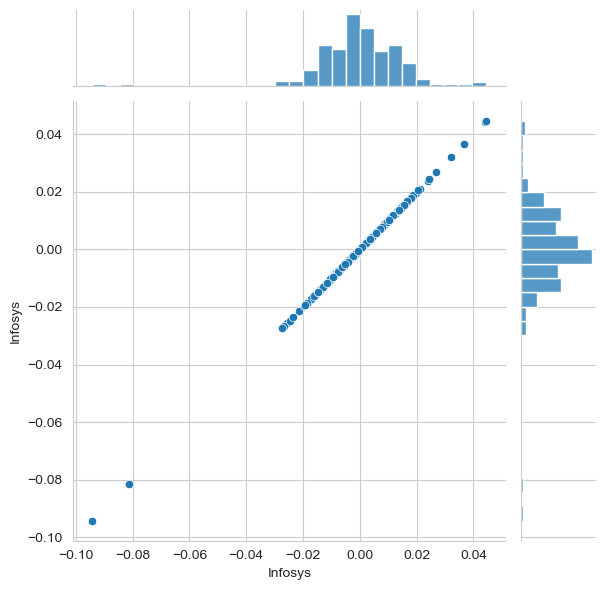

In [56]:
sns.jointplot(x='Infosys',y='Infosys',data=tech_rets[-200:],kind='scatter')

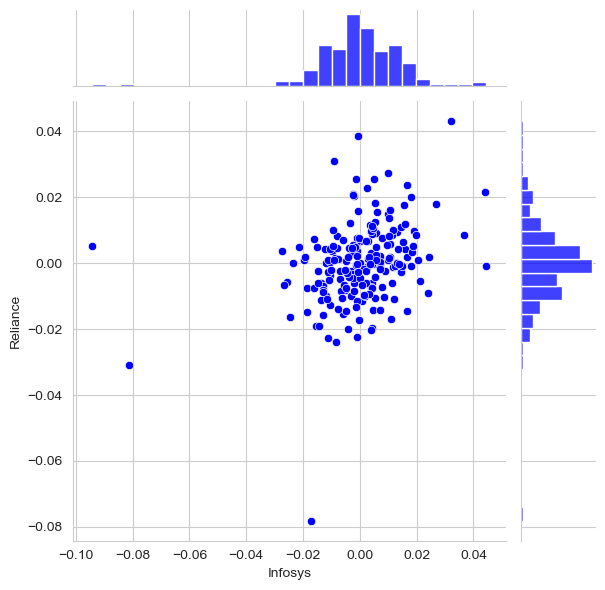

In [58]:
sns.jointplot(x='Infosys',y='Reliance',data=tech_rets[-200:],kind='scatter',color='BLUE')

C:\Users\ANIKET\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


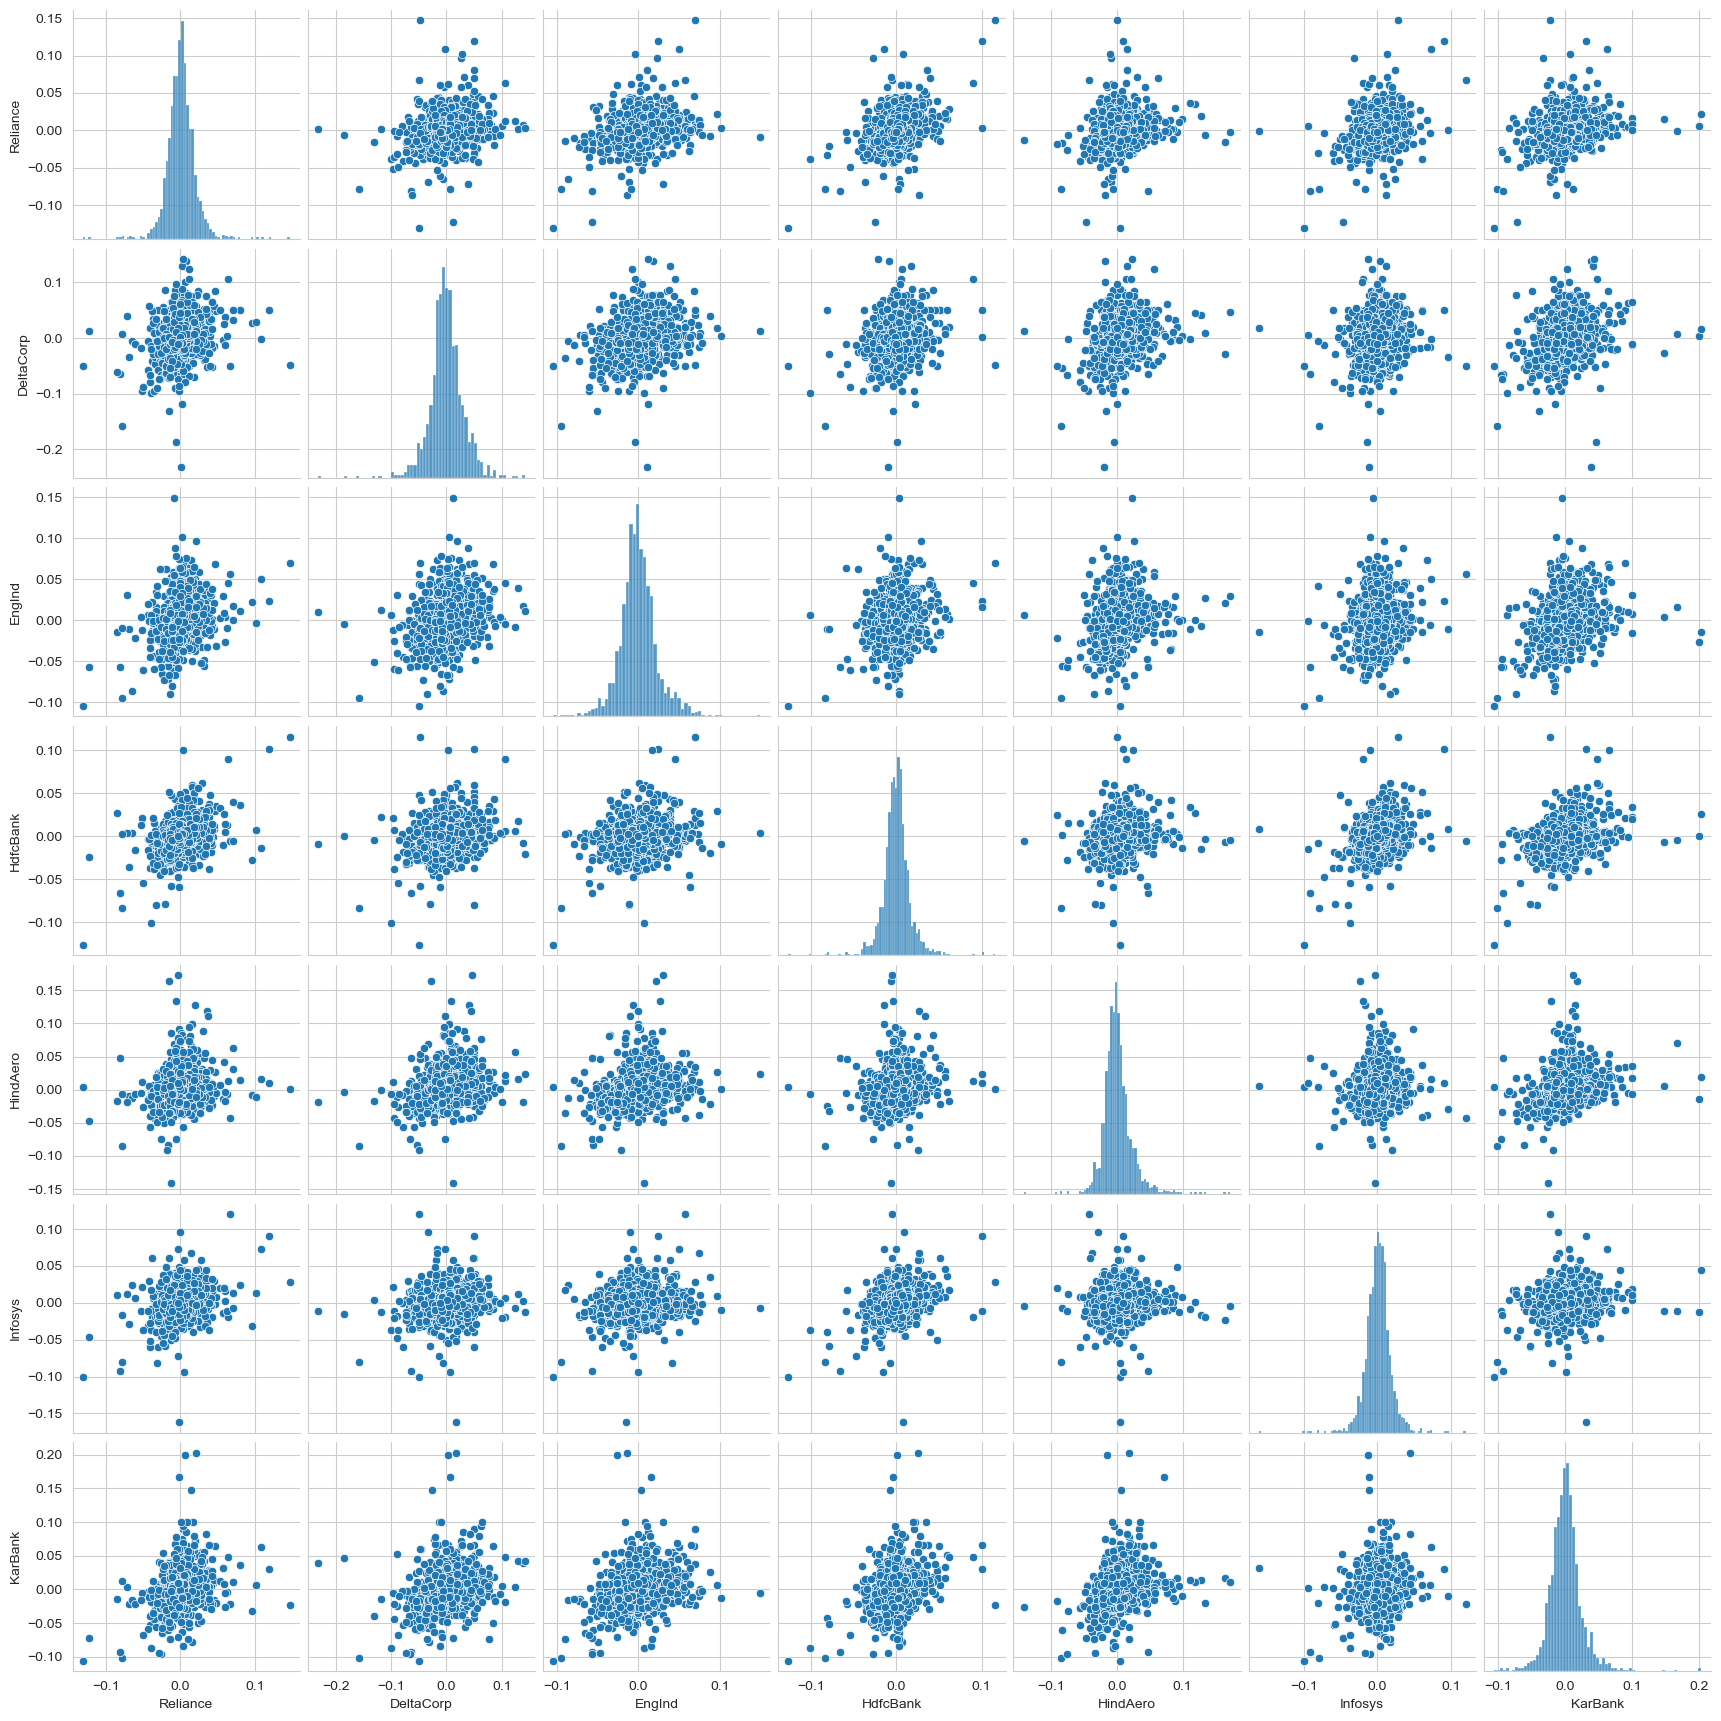

In [59]:
sns.pairplot(tech_rets.dropna())

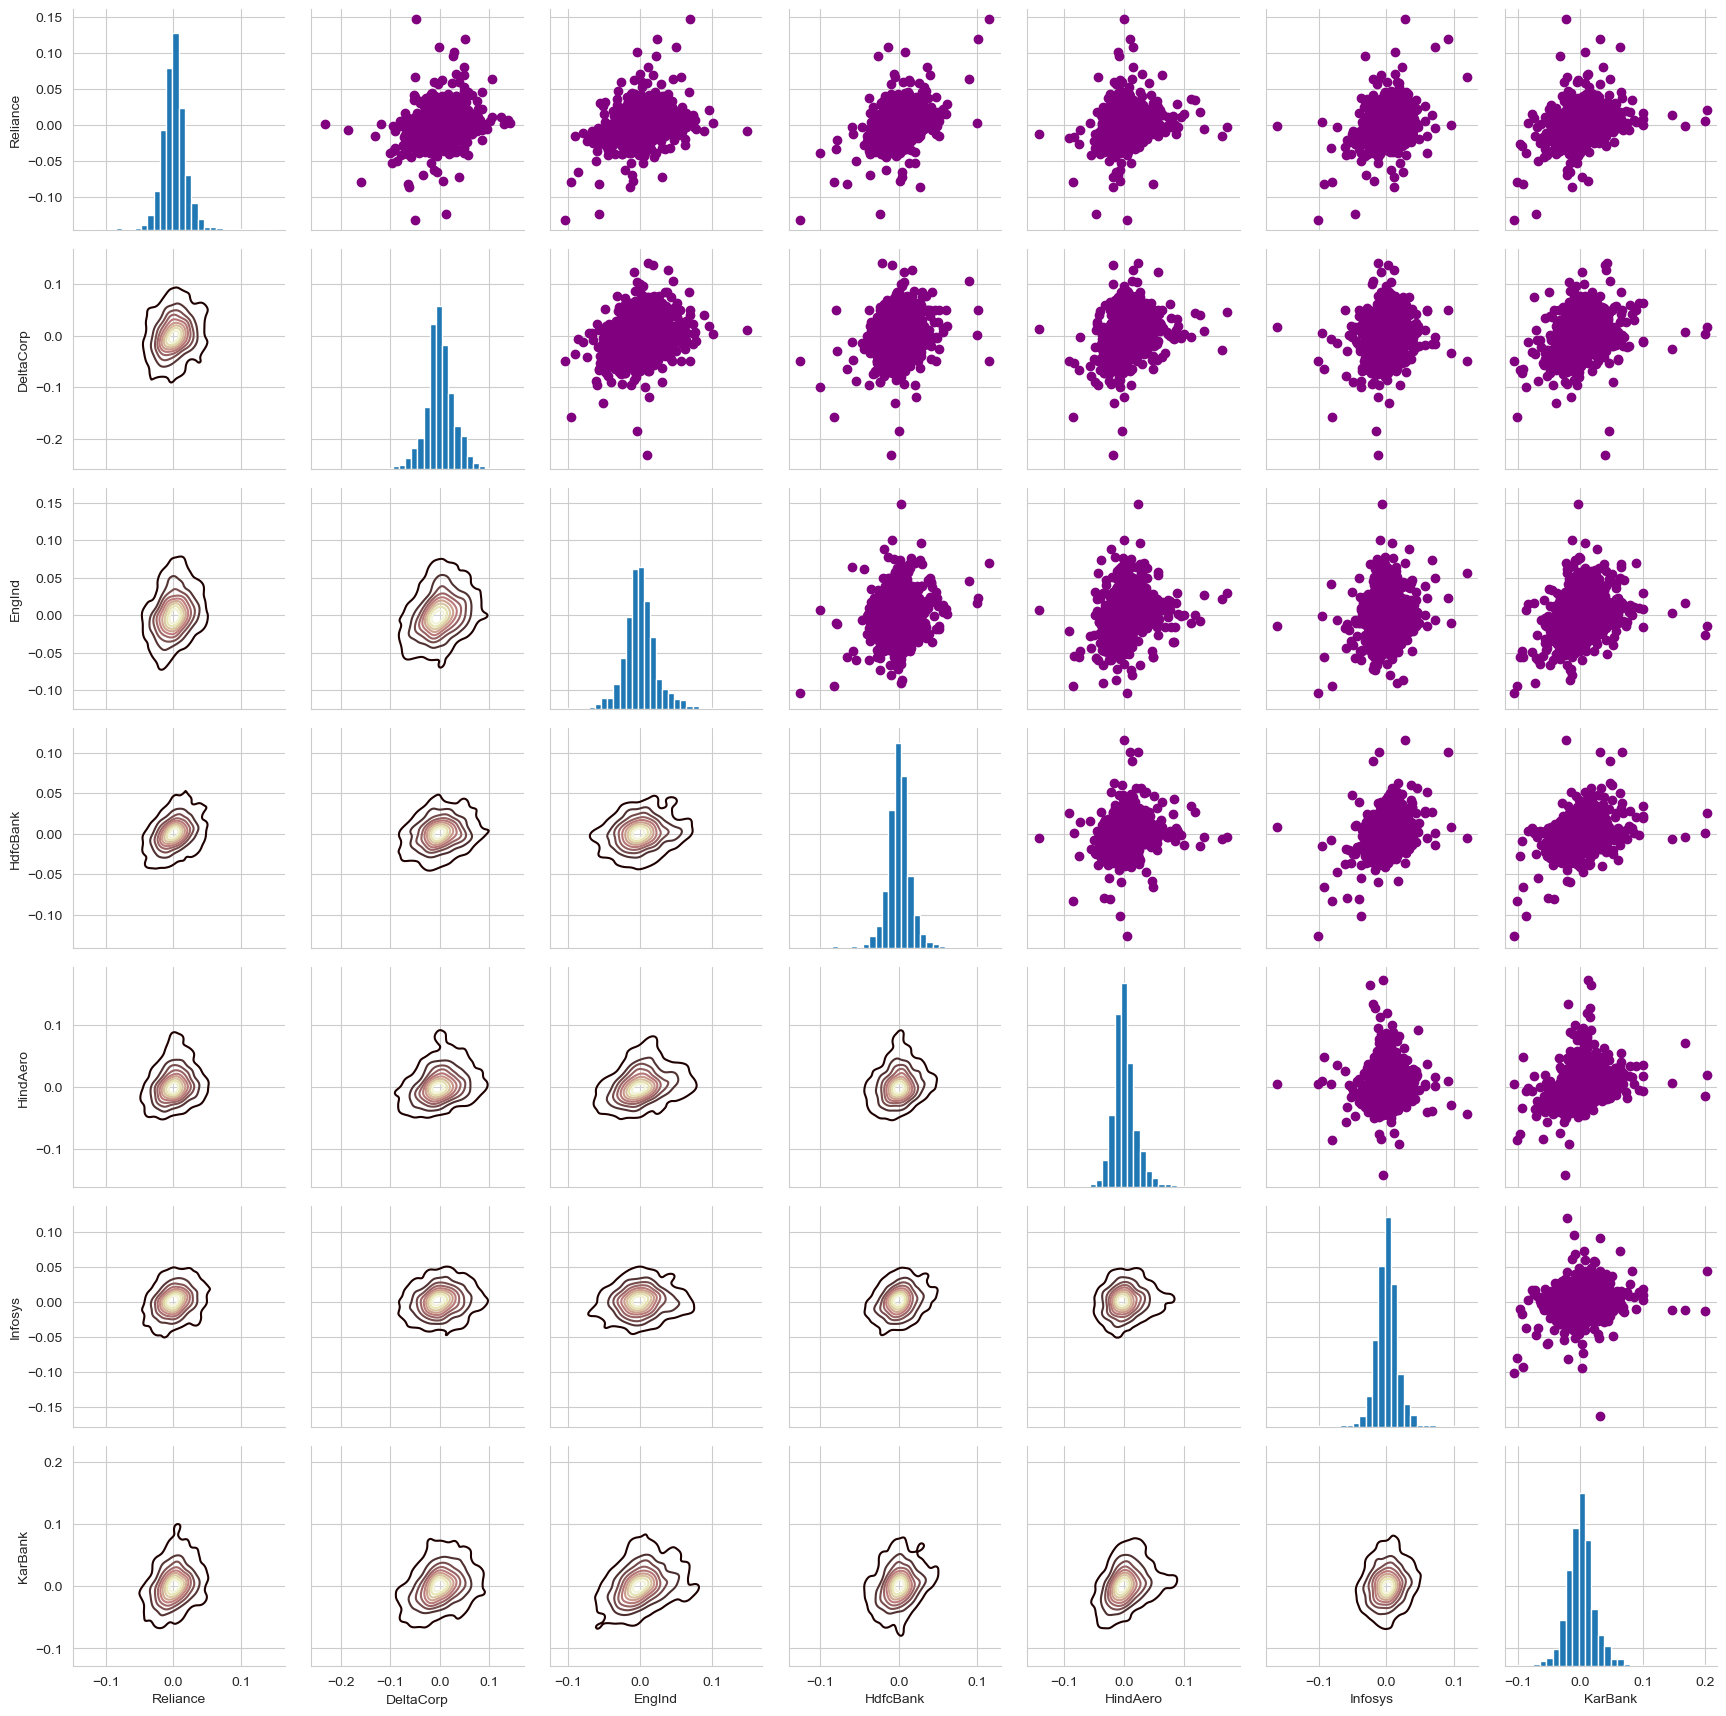

In [63]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='pink')
returns_fig.map_diag(plt.hist,bins=30)

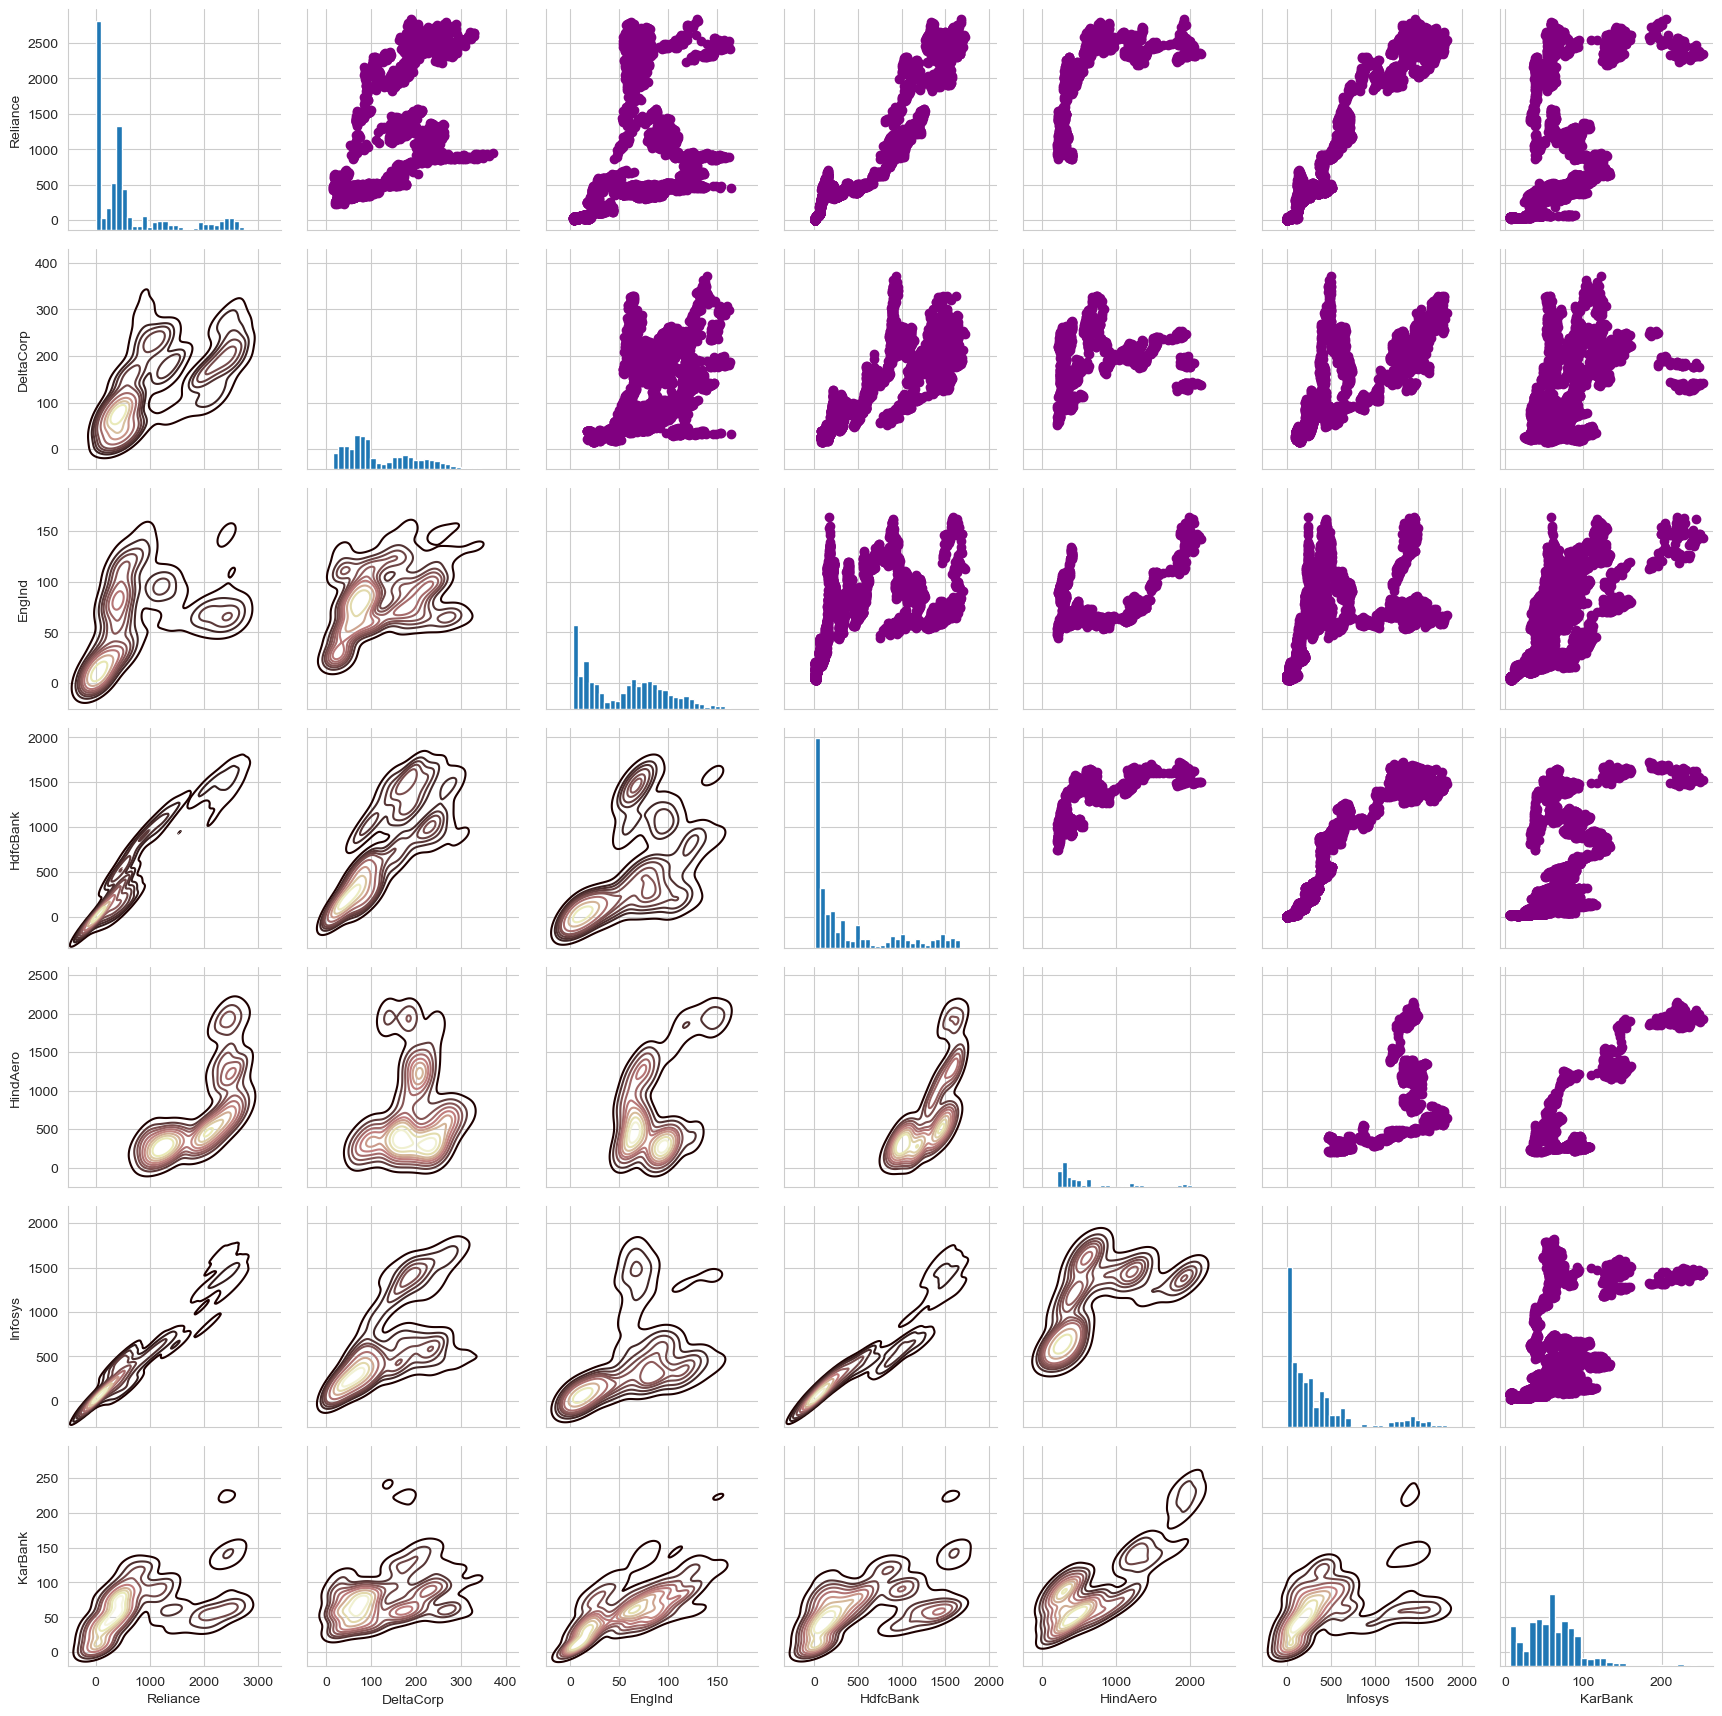

In [64]:
returns_fig = sns.PairGrid(Closing_Data_df)

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='pink')
returns_fig.map_diag(plt.hist,bins=30)

<Axes: >

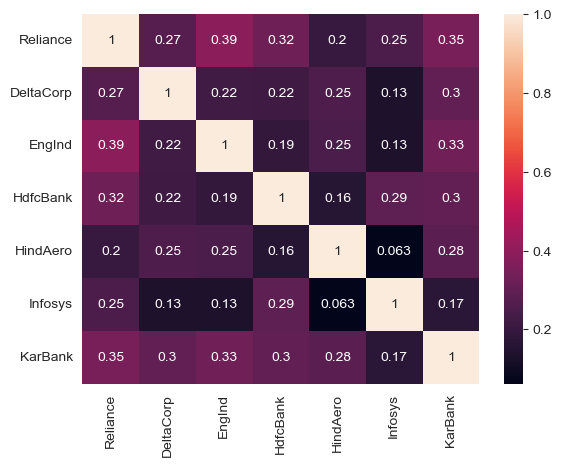

In [65]:
correlation_matrix = tech_rets.corr()

sns.heatmap(correlation_matrix,annot=True)

<Axes: >

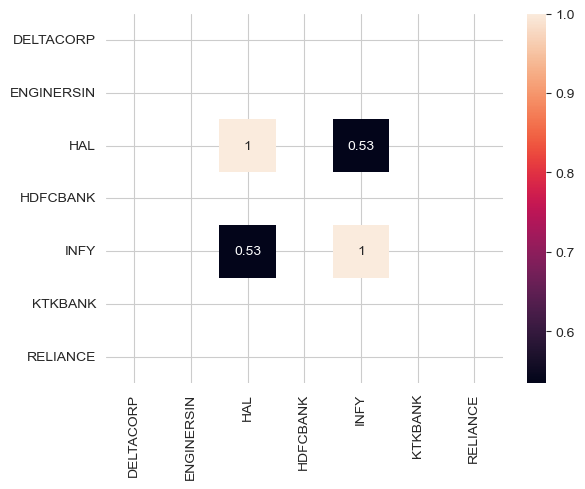

In [66]:
correlation_matrix2 = closing_df.corr()
sns.heatmap(correlation_matrix2,annot=True)

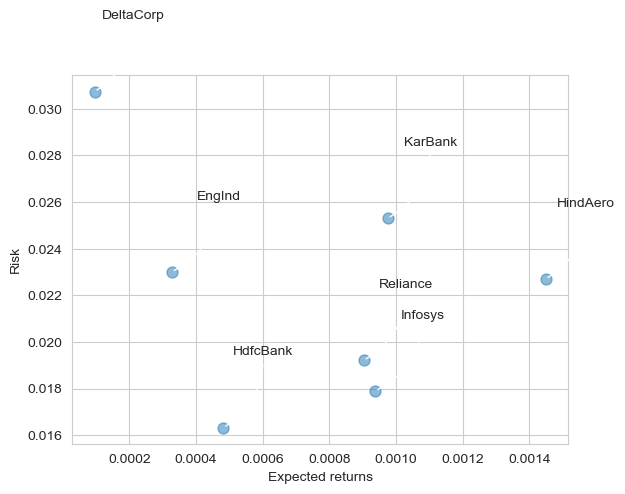

In [67]:
rets =tech_rets.dropna()
area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

plt.xlabel('Expected returns')
plt.ylabel('Risk')


for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


C:\Users\ANIKET\AppData\Local\Temp\ipykernel_12916\2866024279.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=Infosys_data[-200:]['Daily Returns'],bins=50,color='blue')


<Axes: ylabel='Density'>

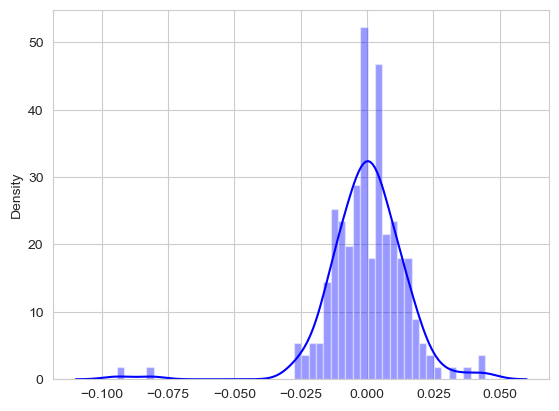

In [69]:
sns.distplot(x=Infosys_data[-200:]['Daily Returns'],bins=50,color='blue')

In [72]:
rets.head()


,Reliance,DeltaCorp,EngInd,HdfcBank,HindAero,Infosys,KarBank
Date,,,,,,,
2018-04-03,0.007391,0.138506,0.017696,-0.007923,-0.017968,0.002902,0.039439
2018-04-04,-0.005169,0.000362,-0.006407,-0.017042,-0.011253,-0.014249,0.005481
2018-04-05,0.014862,0.027647,0.023027,0.013620,-0.001748,0.020771,0.028931
2018-04-06,0.003083,-0.024266,-0.014406,0.007596,-0.009965,-0.017908,0.029747
2018-04-09,0.005488,0.010813,-0.008831,0.008137,0.001451,-0.013975,-0.004353


In [73]:
rets['Infosys'].quantile(0.05)

-0.02524307522919873

Text(0.5, 1.0, 'Monte Carlo Analysis for Infosys')

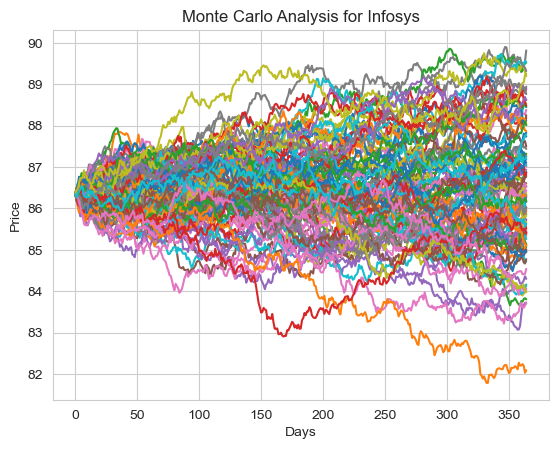

In [76]:
days = 365
dt = 1/days

mu = rets.mean()['Infosys']
sigma = rets.std()['Infosys']

def stock_monte_carlo(start_price, days, mu, sigma):

    price = np.zeros(days)
    price[0] = start_price

    for x in range(1, days): 

        drift = mu * dt
        shock = sigma * np.random.normal(loc=0, scale=np.sqrt(dt))
        
        price[x] = price[x-1] + price[x-1] * (drift + shock)

    return price

start_price = 86.35

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))

plt.xlabel("Days")
plt.ylabel("Price")
plt.title('Monte Carlo Analysis for Infosys')


In [77]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

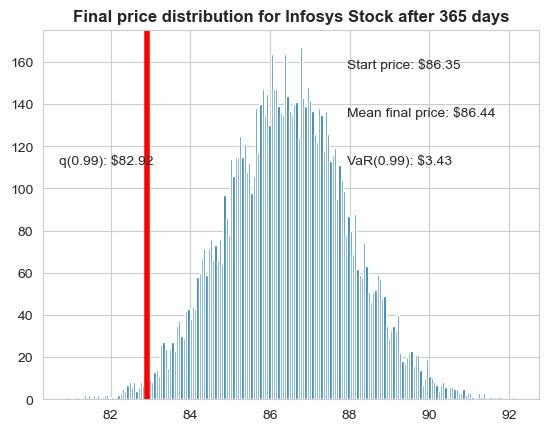

In [78]:
q = np.percentile(simulations,1)
plt.hist(simulations,bins=200)


plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Infosys Stock after %s days" % days, weight='bold');

In [80]:
DeltaCorp_data['20_SMA'] = DeltaCorp_data.Close.rolling(window=20, min_periods=1).mean()
DeltaCorp_data['50_SMA'] = DeltaCorp_data.Close.rolling(window=50, min_periods=1).mean()

In [81]:
DeltaCorp_data['Signal'] = 0
DeltaCorp_data['Signal'] = np.where(DeltaCorp_data['20_SMA']>DeltaCorp_data['50_SMA'],1,0)

In [82]:
DeltaCorp_data['Position'] = DeltaCorp_data.Signal.diff()

In [83]:
DeltaCorp_data['Position']

Date
2007-11-02    NaN
2007-11-05    0.0
2007-11-06    0.0
2007-11-07    0.0
2007-11-08    0.0
             ... 
2023-11-13    0.0
2023-11-15    0.0
2023-11-16    0.0
2023-11-17    0.0
2023-11-20    0.0
Name: Position, Length: 3955, dtype: float64

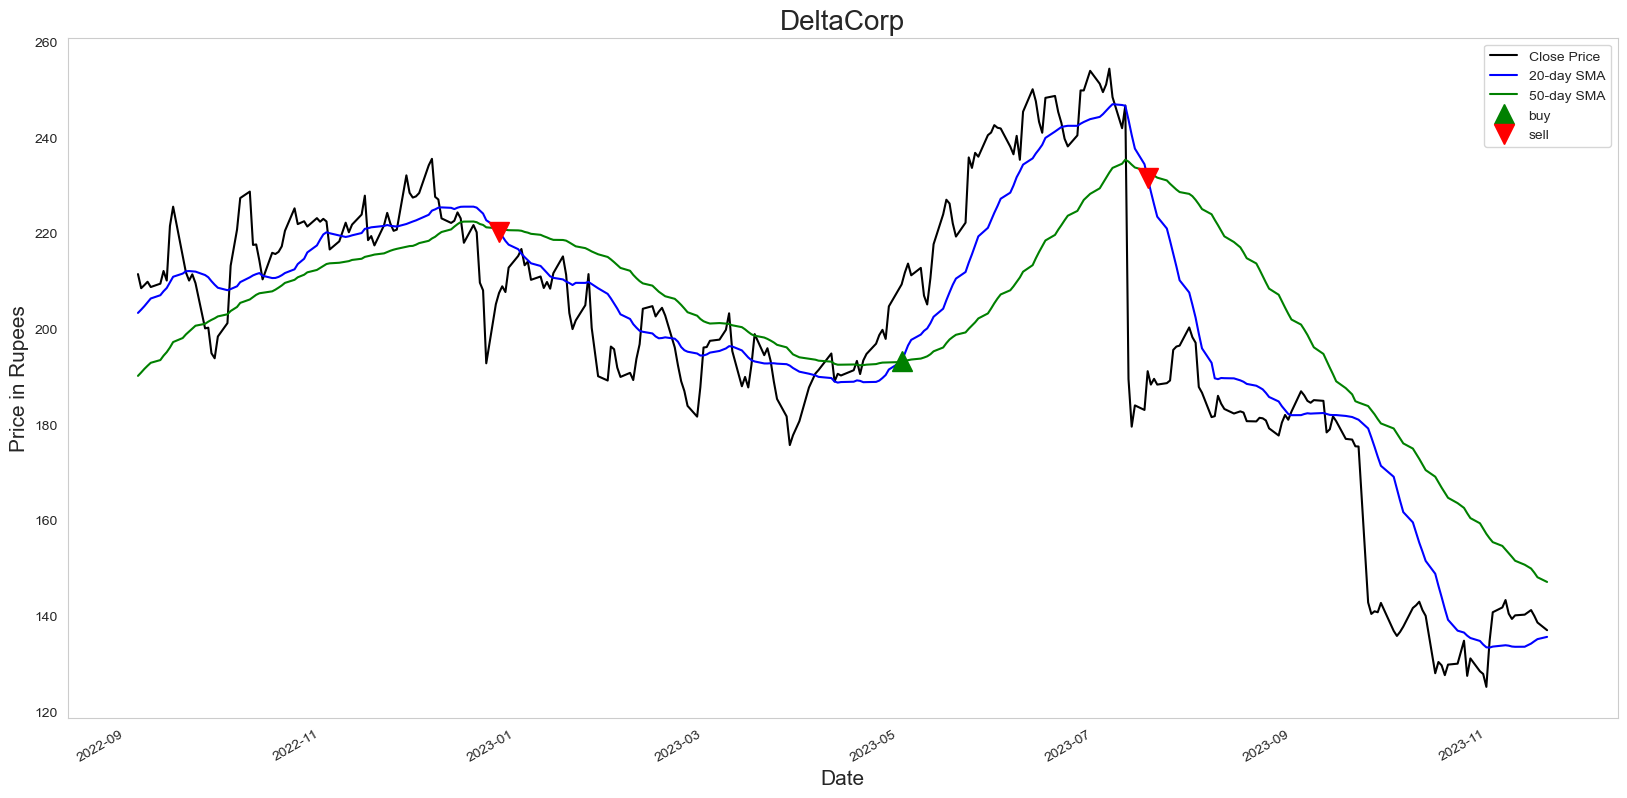

In [85]:
plt.figure(figsize=(20,10))

DeltaCorp_data[-300:]['Close'].plot(color = 'k', label= 'Close Price') 
DeltaCorp_data[-300:]['20_SMA'].plot(color = 'b',label = '20-day SMA')
DeltaCorp_data[-300:]['50_SMA'].plot(color = 'g', label = '50-day SMA')

plt.plot(DeltaCorp_data.iloc[-300:][DeltaCorp_data[-300:]['Position'] == 1].index,
        DeltaCorp_data.iloc[-300:]['20_SMA'][DeltaCorp_data[-300:]['Position'] == 1],
        '^',markersize =15,color='g',label='buy')
plt.plot(DeltaCorp_data.iloc[-300:][DeltaCorp_data[-300:]['Position'] == -1].index,
        DeltaCorp_data.iloc[-300:]['20_SMA'][DeltaCorp_data[-300:]['Position'] == -1],
        'v',markersize =15,color='r',label='sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('DeltaCorp', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [88]:
df_pos = DeltaCorp_data.iloc[-200:][(DeltaCorp_data.iloc[-200:]['Position'] == 1)| (DeltaCorp_data['Position'] == -1)].copy()
df_pos['Position'] = df_pos['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
print(tabulate(df_pos[['Close', 'Position']], headers = 'keys', tablefmt = 'psql'))

+---------------------+---------+------------+
| Date                |   Close | Position   |
|---------------------+---------+------------|
| 2023-05-02 00:00:00 |  209.3  | Buy        |
| 2023-07-18 00:00:00 |  191.15 | Sell       |
+---------------------+---------+------------+


C:\Users\ANIKET\AppData\Local\Temp\ipykernel_12916\1388116825.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pos = DeltaCorp_data.iloc[-200:][(DeltaCorp_data.iloc[-200:]['Position'] == 1)| (DeltaCorp_data['Position'] == -1)].copy()


In [91]:
def GoldenCrossverSignal(name, data_point):
    path = f'./Data/{name}.csv'
    data = pd.read_csv(path, parse_dates=['Date'], index_col='Date')
    data['20_SMA'] = data.Close.rolling(window=20, min_periods=1).mean()
    data['50_SMA'] = data.Close.rolling(window=50, min_periods=1).mean()
    data['Signal'] = 0
    data['Signal'] = np.where(data['20_SMA'] > data['50_SMA'], 1, 0)
    data['Position'] = data.Signal.diff()
    plt.figure(figsize = (20,10))
    # plot close price, short-term and long-term moving averages 
    data.iloc[-data_point:]['Close'].plot(color = 'k', label= 'Close Price') 
    data.iloc[-data_point:]['20_SMA'].plot(color = 'b',label = '20-day SMA') 
    data.iloc[-data_point:]['50_SMA'].plot(color = 'g', label = '50-day SMA')
    # plot ‘buy’ signals
    plt.plot(data.iloc[-data_point:][data.iloc[-data_point:]['Position'] == 1].index, 
             data.iloc[-data_point:]['20_SMA'][data.iloc[-data_point:]['Position'] == 1], 
             '^', markersize = 15, color = 'g', label = 'buy')
    # plot ‘sell’ signals
    plt.plot(data.iloc[-data_point:][data.iloc[-data_point:]['Position'] == -1].index, 
             data.iloc[-data_point:]['20_SMA'][data.iloc[-data_point:]['Position'] == -1], 
             'v', markersize = 15, color = 'r', label = 'sell')
    plt.ylabel('Price in Rupees', fontsize = 15 )
    plt.xlabel('Date', fontsize = 15 )
    plt.title(name, fontsize = 20)
    plt.legend()
    plt.grid()
    plt.show()
    df_pos = data.iloc[-data_point:][(data.iloc[-data_point:]['Position'] == 1) | (data['Position'] == -1)].copy()
    df_pos['Position'] = df_pos['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
    print(tabulate(df_pos[['Close', 'Position']], headers = 'keys', tablefmt = 'psql'))

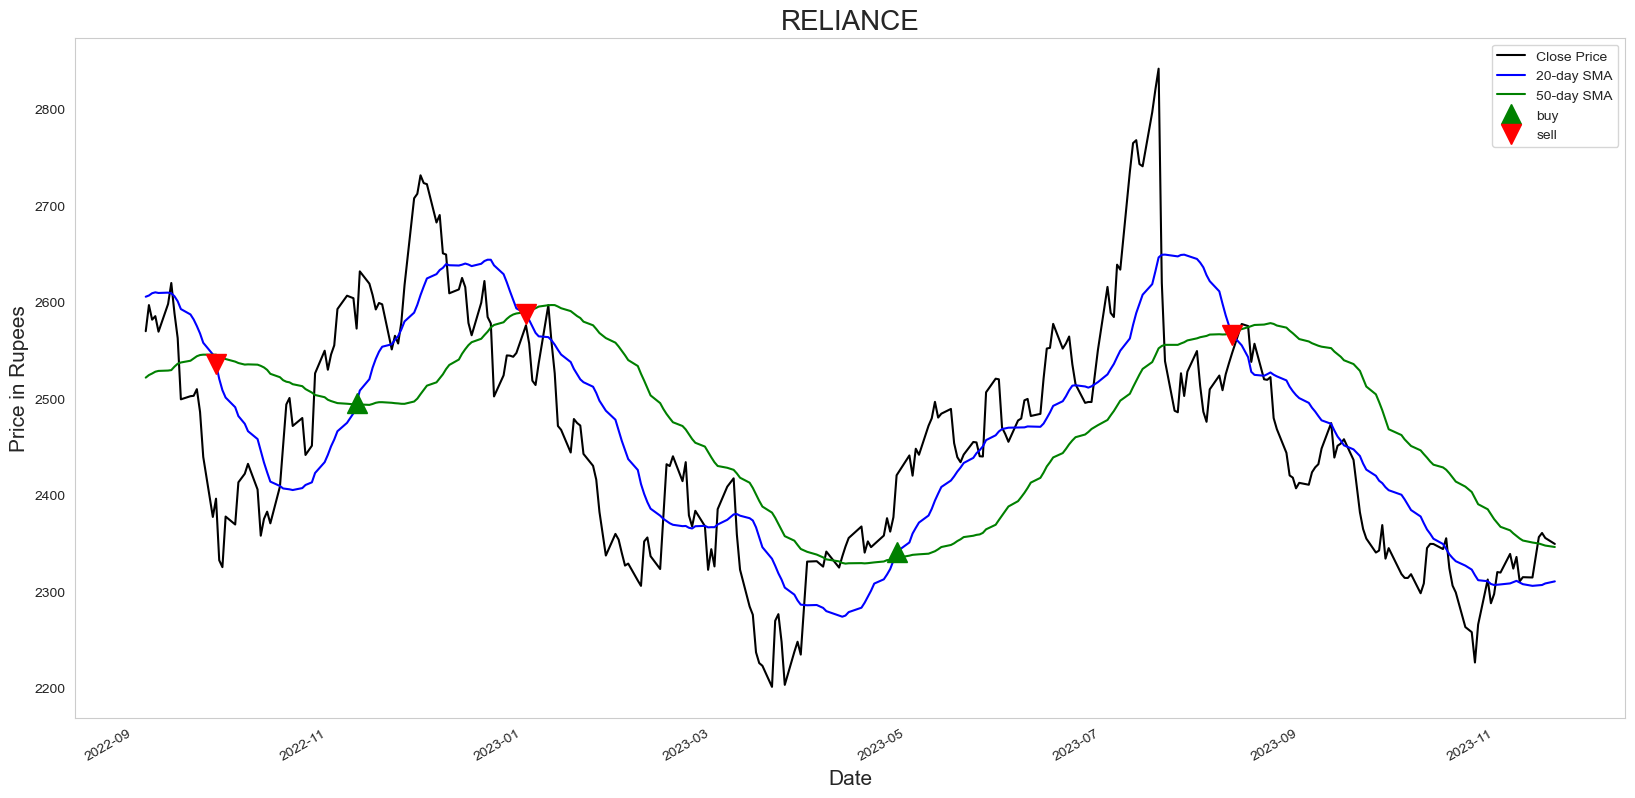

+---------------------+---------+------------+
| Date                |   Close | Position   |
|---------------------+---------+------------|
| 2022-09-27 00:00:00 | 2396.25 | Sell       |
| 2022-11-10 00:00:00 | 2572.5  | Buy        |
| 2023-01-02 00:00:00 | 2575.9  | Sell       |
| 2023-04-28 00:00:00 | 2420.5  | Buy        |
| 2023-08-11 00:00:00 | 2547.15 | Sell       |
+---------------------+---------+------------+


C:\Users\ANIKET\AppData\Local\Temp\ipykernel_12916\2863968684.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pos = data.iloc[-data_point:][(data.iloc[-data_point:]['Position'] == 1) | (data['Position'] == -1)].copy()


In [92]:
GoldenCrossverSignal('RELIANCE', 300)